# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle, os

data_path = './traffic-signs-data'
# TODO: Fill this in based on where you saved the training and testing data

training_file = os.path.join(data_path, 'train.p')
validation_file=os.path.join(data_path, 'valid.p')
testing_file = os.path.join(data_path, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
norm_X_train = (X_train.astype('int32')-128)/128
norm_X_valid = (X_valid.astype('int32')-128)/128
norm_X_test = (X_test.astype('int32')-128)/128
print('min scaled value: {}, max scaled value: {}'.format(np.min(norm_X_train), np.max(norm_X_train)))

min scaled value: -1.0, max scaled value: 0.9921875


### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [6]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x, channels=1, classes=10):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, channels, 6), mean = mu, stddev = sigma), name='conv1_W')
    conv1_b = tf.Variable(tf.zeros(6), name='conv1_b')
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name='conv2_W')
    conv2_b = tf.Variable(tf.zeros(16), name='conv2_b')
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name='fc1_W')
    fc1_b = tf.Variable(tf.zeros(120), name='fc1_b')
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name='fc2_W')
    fc2_b  = tf.Variable(tf.zeros(84), name='fc2_b')
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, classes), mean = mu, stddev = sigma), name='fc3_W')
    fc3_b  = tf.Variable(tf.zeros(classes), name='fc3_b')
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [8]:
def evaluate(X_data, y_data, BATCH_SIZE):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [20]:
from sklearn.utils import shuffle
import os, json

CHANNELS = 3
EPOCHS = 50
SAVING_PATH = './3_channel_norm_centered'


for learning_rate in [0.01, 0.001, 0.0001]:
    for batch_size in [32,64,128]:
        
        model_name = 'lr_{}_bs_{}'.format(learning_rate, batch_size)
        if not os.path.exists(os.path.join(SAVING_PATH, model_name)):
            os.mkdir(os.path.join(SAVING_PATH, model_name))
            
        train_stats = []
        
        tf.reset_default_graph()
        
        x = tf.placeholder(tf.float32, (None, 32, 32, CHANNELS))
        y = tf.placeholder(tf.int32, (None))
        one_hot_y = tf.one_hot(y, n_classes)
        
        logits = LeNet(x, channels=CHANNELS, classes=n_classes)
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
        loss_operation = tf.reduce_mean(cross_entropy)
        optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
        training_operation = optimizer.minimize(loss_operation)
        
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
        accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
        saver = tf.train.Saver()
        
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            num_examples = len(norm_X_train)
            print("Training...{}".format(model_name))
            print()
            for i in range(EPOCHS):
                norm_X_train, y_train = shuffle(norm_X_train, y_train)
                
#                 if lr_extinction:
#                     curr_rate = rate*(math.exp(-i/extinction_rate))
#                     print('Current rate: {}'.format(curr_rate))
#                     optimizer = tf.train.AdamOptimizer(learning_rate = curr_rate)
#                     #training_operation = optimizer.minimize(loss_operation)

                for offset in range(0, num_examples, batch_size):
                    end = offset + batch_size
                    batch_x, batch_y = norm_X_train[offset:end], y_train[offset:end]
                    sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

                validation_accuracy = evaluate(norm_X_valid, y_valid, batch_size)
                train_stats.append([i, validation_accuracy])
                print("    EPOCH {} ...".format(i+1))
                print("    Validation Accuracy = {:.3f}".format(validation_accuracy))
                print()
                saver.save(sess, os.path.join(SAVING_PATH, model_name, 'model'), global_step=i+1)
            with open(os.path.join(SAVING_PATH, model_name, 'train_stats.json'), 'w') as f:
                json.dump(train_stats, f)
            print('------------------------\n')

Training...lr_0.01_bs_32

    EPOCH 1 ...
    Validation Accuracy = 0.765

    EPOCH 2 ...
    Validation Accuracy = 0.796

    EPOCH 3 ...
    Validation Accuracy = 0.788

    EPOCH 4 ...
    Validation Accuracy = 0.705

    EPOCH 5 ...
    Validation Accuracy = 0.781

    EPOCH 6 ...
    Validation Accuracy = 0.749

    EPOCH 7 ...
    Validation Accuracy = 0.757

    EPOCH 8 ...
    Validation Accuracy = 0.683

    EPOCH 9 ...
    Validation Accuracy = 0.801

    EPOCH 10 ...
    Validation Accuracy = 0.835

    EPOCH 11 ...
    Validation Accuracy = 0.761

    EPOCH 12 ...
    Validation Accuracy = 0.806

    EPOCH 13 ...
    Validation Accuracy = 0.709

    EPOCH 14 ...
    Validation Accuracy = 0.819

    EPOCH 15 ...
    Validation Accuracy = 0.739

    EPOCH 16 ...
    Validation Accuracy = 0.601

    EPOCH 17 ...
    Validation Accuracy = 0.744

    EPOCH 18 ...
    Validation Accuracy = 0.737

    EPOCH 19 ...
    Validation Accuracy = 0.742

    EPOCH 20 ...
    Validation A

    EPOCH 12 ...
    Validation Accuracy = 0.934

    EPOCH 13 ...
    Validation Accuracy = 0.934

    EPOCH 14 ...
    Validation Accuracy = 0.936

    EPOCH 15 ...
    Validation Accuracy = 0.928

    EPOCH 16 ...
    Validation Accuracy = 0.943

    EPOCH 17 ...
    Validation Accuracy = 0.943

    EPOCH 18 ...
    Validation Accuracy = 0.939

    EPOCH 19 ...
    Validation Accuracy = 0.940

    EPOCH 20 ...
    Validation Accuracy = 0.940

    EPOCH 21 ...
    Validation Accuracy = 0.942

    EPOCH 22 ...
    Validation Accuracy = 0.942

    EPOCH 23 ...
    Validation Accuracy = 0.944

    EPOCH 24 ...
    Validation Accuracy = 0.945

    EPOCH 25 ...
    Validation Accuracy = 0.945

    EPOCH 26 ...
    Validation Accuracy = 0.948

    EPOCH 27 ...
    Validation Accuracy = 0.946

    EPOCH 28 ...
    Validation Accuracy = 0.943

    EPOCH 29 ...
    Validation Accuracy = 0.949

    EPOCH 30 ...
    Validation Accuracy = 0.931

    EPOCH 31 ...
    Validation Accuracy = 0.946



    EPOCH 24 ...
    Validation Accuracy = 0.875

    EPOCH 25 ...
    Validation Accuracy = 0.878

    EPOCH 26 ...
    Validation Accuracy = 0.886

    EPOCH 27 ...
    Validation Accuracy = 0.881

    EPOCH 28 ...
    Validation Accuracy = 0.878

    EPOCH 29 ...
    Validation Accuracy = 0.882

    EPOCH 30 ...
    Validation Accuracy = 0.896

    EPOCH 31 ...
    Validation Accuracy = 0.893

    EPOCH 32 ...
    Validation Accuracy = 0.886

    EPOCH 33 ...
    Validation Accuracy = 0.894

    EPOCH 34 ...
    Validation Accuracy = 0.885

    EPOCH 35 ...
    Validation Accuracy = 0.888

    EPOCH 36 ...
    Validation Accuracy = 0.875

    EPOCH 37 ...
    Validation Accuracy = 0.894

    EPOCH 38 ...
    Validation Accuracy = 0.897

    EPOCH 39 ...
    Validation Accuracy = 0.896

    EPOCH 40 ...
    Validation Accuracy = 0.893

    EPOCH 41 ...
    Validation Accuracy = 0.898

    EPOCH 42 ...
    Validation Accuracy = 0.894

    EPOCH 43 ...
    Validation Accuracy = 0.895



## Visualizing the results

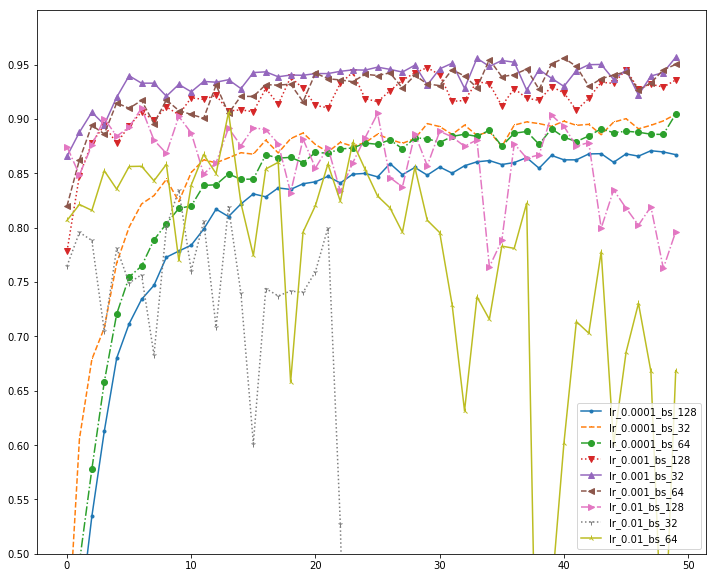

In [88]:
from itertools import cycle
from matplotlib import lines, markers
m = markers.MarkerStyle.markers.keys()
l = [l_ for l_ in lines.lineStyles.keys() if l_ not in ['None', ' ','']]
linecycler = cycle(l)
markercycler = cycle(m)

train_results = {}
for folder in os.listdir(SAVING_PATH):
    f = [v for v in os.listdir(os.path.join(SAVING_PATH, folder)) if v.endswith('.json')][0]
    with open(os.path.join(SAVING_PATH, folder, f), 'r') as d:
        data = json.load(d)
    train_results[folder] = data
    
plt.figure(figsize=(12,10))
plt.yticks(np.arange(0,1,0.05))
plt.ylim(0.5,1)

for k, v in train_results.items():
    data = np.array(v).reshape(-1,2)
    plt.plot(data[:,0], data[:,1], label=k, linestyle=next(linecycler), marker=next(markercycler))
    plt.legend()

In [115]:
CHANNELS = 3
EPOCHS = 100
SAVING_PATH = './3_channel_norm_centered_decay_rate'
DECAY_STEPS = 10
DECAY_RATE = 0.5


for learning_rate in [0.001]:
    for batch_size in [32,64,128]:
        
        model_name = 'lr_{}_bs_{}'.format(learning_rate, batch_size)
        if not os.path.exists(os.path.join(SAVING_PATH, model_name)):
            os.mkdir(os.path.join(SAVING_PATH, model_name))
            
        train_stats = []
        
        tf.reset_default_graph()
        
        x = tf.placeholder(tf.float32, (None, 32, 32, CHANNELS))
        y = tf.placeholder(tf.int32, (None))
        one_hot_y = tf.one_hot(y, n_classes)
        
        logits = LeNet(x, channels=CHANNELS, classes=n_classes)
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
        loss_operation = tf.reduce_mean(cross_entropy)
        global_step = tf.Variable(0, trainable=False, dtype=tf.int32)
        learning_rate_placeholder = tf.placeholder(tf.float32, [])
        optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate_placeholder)
        training_operation = optimizer.minimize(loss_operation)
        
        correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
        accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        
        
        
        saver = tf.train.Saver()
        
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            num_examples = len(norm_X_train)
            print("Training...{}".format(model_name))
            print()
            for i in range(EPOCHS):
                norm_X_train, y_train = shuffle(norm_X_train, y_train)
                learning_rate_d = learning_rate*(DECAY_RATE**(int(i/DECAY_STEPS)))
                
#                 if lr_extinction:
#                     curr_rate = rate*(math.exp(-i/extinction_rate))
#                     print('Current rate: {}'.format(curr_rate))
#                     optimizer = tf.train.AdamOptimizer(learning_rate = curr_rate)
#                     #training_operation = optimizer.minimize(loss_operation)

                for offset in range(0, num_examples, batch_size):
                    end = offset + batch_size
                    batch_x, batch_y = norm_X_train[offset:end], y_train[offset:end]
                    sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, learning_rate_placeholder: learning_rate_d})

                validation_accuracy = evaluate(norm_X_valid, y_valid, batch_size)
                train_stats.append([i, validation_accuracy])
                print("    EPOCH {} ...".format(i+1))
                #print("    learning rate: {}".format(sess.run(optimizer._lr)))
                print("    Validation Accuracy = {:.3f}".format(validation_accuracy))
                print()
                saver.save(sess, os.path.join(SAVING_PATH, model_name, 'model'), global_step=i+1)
            with open(os.path.join(SAVING_PATH, model_name, 'train_stats.json'), 'w') as f:
                json.dump(train_stats, f)
            print('------------------------\n')

Training...lr_0.001_bs_32

    EPOCH 1 ...
    Validation Accuracy = 0.869

    EPOCH 2 ...
    Validation Accuracy = 0.849

    EPOCH 3 ...
    Validation Accuracy = 0.895

    EPOCH 4 ...
    Validation Accuracy = 0.922

    EPOCH 5 ...
    Validation Accuracy = 0.926

    EPOCH 6 ...
    Validation Accuracy = 0.910

    EPOCH 7 ...
    Validation Accuracy = 0.910

    EPOCH 8 ...
    Validation Accuracy = 0.924

    EPOCH 9 ...
    Validation Accuracy = 0.929

    EPOCH 10 ...
    Validation Accuracy = 0.924

    EPOCH 11 ...
    Validation Accuracy = 0.936

    EPOCH 12 ...
    Validation Accuracy = 0.939

    EPOCH 13 ...
    Validation Accuracy = 0.933

    EPOCH 14 ...
    Validation Accuracy = 0.932

    EPOCH 15 ...
    Validation Accuracy = 0.935

    EPOCH 16 ...
    Validation Accuracy = 0.937

    EPOCH 17 ...
    Validation Accuracy = 0.926

    EPOCH 18 ...
    Validation Accuracy = 0.922

    EPOCH 19 ...
    Validation Accuracy = 0.932

    EPOCH 20 ...
    Validation 

    EPOCH 64 ...
    Validation Accuracy = 0.938

    EPOCH 65 ...
    Validation Accuracy = 0.937

    EPOCH 66 ...
    Validation Accuracy = 0.938

    EPOCH 67 ...
    Validation Accuracy = 0.936

    EPOCH 68 ...
    Validation Accuracy = 0.937

    EPOCH 69 ...
    Validation Accuracy = 0.938

    EPOCH 70 ...
    Validation Accuracy = 0.936

    EPOCH 71 ...
    Validation Accuracy = 0.937

    EPOCH 72 ...
    Validation Accuracy = 0.937

    EPOCH 73 ...
    Validation Accuracy = 0.936

    EPOCH 74 ...
    Validation Accuracy = 0.937

    EPOCH 75 ...
    Validation Accuracy = 0.937

    EPOCH 76 ...
    Validation Accuracy = 0.937

    EPOCH 77 ...
    Validation Accuracy = 0.936

    EPOCH 78 ...
    Validation Accuracy = 0.937

    EPOCH 79 ...
    Validation Accuracy = 0.937

    EPOCH 80 ...
    Validation Accuracy = 0.936

    EPOCH 81 ...
    Validation Accuracy = 0.936

    EPOCH 82 ...
    Validation Accuracy = 0.937

    EPOCH 83 ...
    Validation Accuracy = 0.936



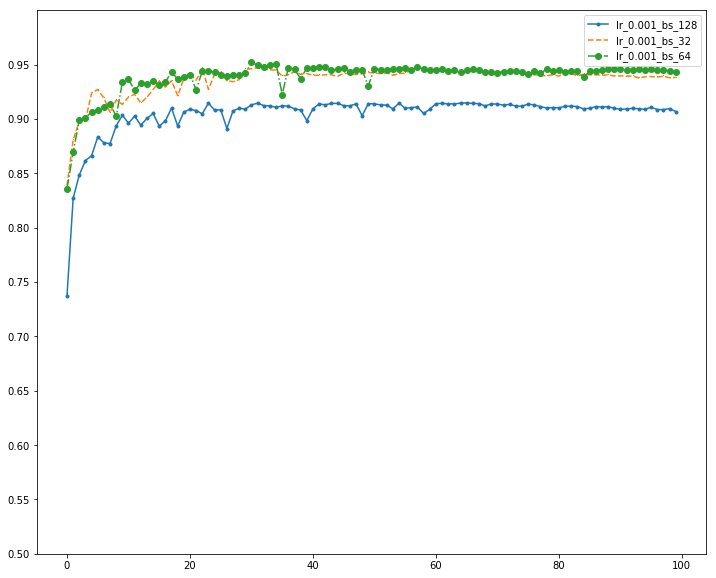

In [113]:
from itertools import cycle
from matplotlib import lines, markers
m = markers.MarkerStyle.markers.keys()
l = [l_ for l_ in lines.lineStyles.keys() if l_ not in ['None', ' ','']]
linecycler = cycle(l)
markercycler = cycle(m)

train_results = {}
for folder in os.listdir(SAVING_PATH):
    f = [v for v in os.listdir(os.path.join(SAVING_PATH, folder)) if v.endswith('.json')][0]
    with open(os.path.join(SAVING_PATH, folder, f), 'r') as d:
        data = json.load(d)
    train_results[folder] = data
    
plt.figure(figsize=(12,10))
plt.yticks(np.arange(0,1,0.05))
plt.ylim(0.5,1)

for k, v in train_results.items():
    data = np.array(v).reshape(-1,2)
    plt.plot(data[:,0], data[:,1], label=k, linestyle=next(linecycler), marker=next(markercycler))
    plt.legend()

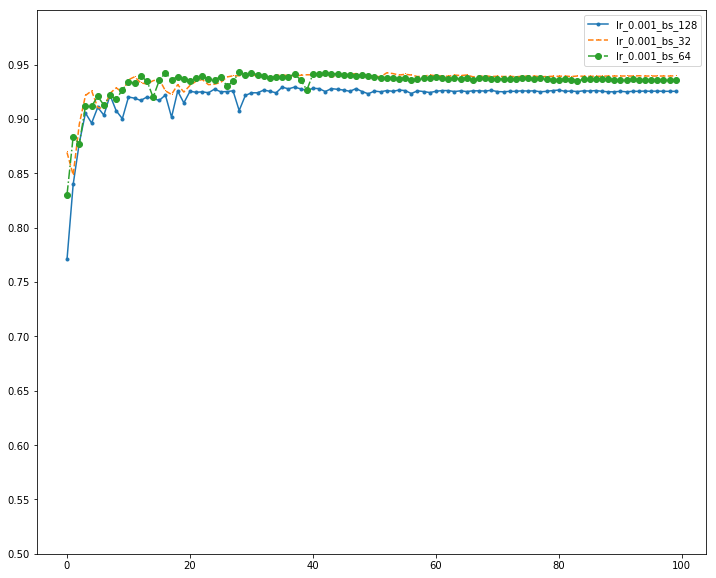

In [116]:
m = markers.MarkerStyle.markers.keys()
l = [l_ for l_ in lines.lineStyles.keys() if l_ not in ['None', ' ','']]
linecycler = cycle(l)
markercycler = cycle(m)

train_results = {}
for folder in os.listdir(SAVING_PATH):
    f = [v for v in os.listdir(os.path.join(SAVING_PATH, folder)) if v.endswith('.json')][0]
    with open(os.path.join(SAVING_PATH, folder, f), 'r') as d:
        data = json.load(d)
    train_results[folder] = data
    
plt.figure(figsize=(12,10))
plt.yticks(np.arange(0,1,0.05))
plt.ylim(0.5,1)

for k, v in train_results.items():
    data = np.array(v).reshape(-1,2)
    plt.plot(data[:,0], data[:,1], label=k, linestyle=next(linecycler), marker=next(markercycler))
    plt.legend()

## Evaluation on test data

In [114]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, (None, 32, 32, CHANNELS))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = LeNet(x, channels=CHANNELS, classes=n_classes)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(os.path.join(SAVING_PATH, 'lr_0.001_bs_64')))
    test_accuracy = evaluate(norm_X_test, y_test, 64)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./3_channel_norm_centered_decay_rate\lr_0.001_bs_64\model-100
Test Accuracy = 0.932


In [74]:
import json, os, math
from sklearn.utils import shuffle

def evaluate(X_data, y_data, x, y, BATCH_SIZE, accuracy_operation, channels=1):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def train_model(X_train, y_train, X_val, y_val,
                channels=1, classes=10, rate=0.001, batch_size=64, epochs=10, saving_path='.', model_name='model',
               lr_extinction=False, extinction_rate=None):
    x = tf.placeholder(tf.float32, (None, 32, 32, channels))
    y = tf.placeholder(tf.int32, (None))
    one_hot_y = tf.one_hot(y, classes)
    
    logits = LeNet(x, channels=channels, classes=classes)
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
    loss_operation = tf.reduce_mean(cross_entropy)
    optimizer = tf.train.AdamOptimizer(learning_rate = rate)
    training_operation = optimizer.minimize(loss_operation)
    
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    train_stats = {}
    
    with tf.Session() as sess:
        saver = tf.train.Saver(max_to_keep=11)
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        saver.save(sess, os.path.join(saving_path, model_name), global_step=(1000))
        
        
        print("Training...")
        print()
        for i in range(epochs):
            X_train, y_train = shuffle(X_train, y_train)
            if lr_extinction:
                curr_rate = rate*(math.exp(-i/extinction_rate))
                print('Current rate: {}'.format(curr_rate))
                optimizer = tf.train.AdamOptimizer(learning_rate = curr_rate)
                #training_operation = optimizer.minimize(loss_operation)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

            saver.save(sess, os.path.join(saving_path, model_name), global_step=(i+1))

            validation_accuracy = evaluate(X_val, y_val, x, y, batch_size, accuracy_operation, channels)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
            train_stats[i] = validation_accuracy
        w = [v for v in tf.trainable_variables() if v.name == "conv1_W:0"][0]
        print(sess.run(w))

#         if not os.path.exists(saving_path):
#             os.mkdir(saving_path)

#         with open(os.path.join(saving_path, model_name+'.txt'), 'w') as f:
#             f.write('learning rate = {}\n'.format(rate))
#             f.write('batch size = {}\n'.format(batch_size))
#             json.dump(train_stats, f)

        #saver.save(sess, os.path.join(saving_path, model_name))
        print("Finished")

In [75]:
train_model(norm_X_train, y_train, norm_X_valid, y_valid, channels=3, classes=n_classes, saving_path='./train_norm_features',
           model_name = 'lr_0.001_bs_64', epochs=3)

Training...

EPOCH 1 ...
Validation Accuracy = 0.803

EPOCH 2 ...
Validation Accuracy = 0.858

EPOCH 3 ...
Validation Accuracy = 0.886

[[[[  1.56045139e-01   1.09957956e-01  -3.66717018e-02  -9.95166674e-02
     -4.60298769e-02   9.33445618e-02]
   [ -1.67433664e-01  -1.86055955e-02   2.17237249e-02   2.42572036e-02
     -2.62778979e-02  -7.31910989e-02]
   [  6.12333380e-02  -1.42414808e-01   8.27538446e-02  -5.42248562e-02
     -4.81041335e-02   1.08875386e-01]]

  [[ -5.12223840e-02  -6.92183152e-03  -1.58757284e-01   3.91725749e-02
     -1.65541396e-01  -3.31697278e-02]
   [  1.74574345e-01  -7.57810548e-02   7.98844695e-02   1.24186829e-01
      8.12466145e-02  -2.10690405e-02]
   [ -5.89856580e-02  -5.66264875e-02  -1.02151945e-01   1.76025908e-02
      1.02181628e-01   1.08752131e-01]]

  [[  4.55480516e-02   1.68149158e-01  -5.04694395e-02  -1.89321563e-01
      1.13284446e-01   1.38607085e-01]
   [  6.34656921e-02  -1.22832062e-04  -2.30572298e-02  -8.88846889e-02
      5.119

In [30]:
from tensorflow.python.tools import inspect_checkpoint as chkp

In [33]:
tf.train.latest_checkpoint('./train_norm_features')

'./train_norm_features\\lr_0.001_bs_64-10'

In [78]:
chkp.print_tensors_in_checkpoint_file('./train_norm_features\\lr_0.001_bs_64-3', tensor_name='conv1_W', all_tensors=False)

tensor_name:  conv1_W
[[[[  1.56045139e-01   1.09957956e-01  -3.66717018e-02  -9.95166674e-02
     -4.60298769e-02   9.33445618e-02]
   [ -1.67433664e-01  -1.86055955e-02   2.17237249e-02   2.42572036e-02
     -2.62778979e-02  -7.31910989e-02]
   [  6.12333380e-02  -1.42414808e-01   8.27538446e-02  -5.42248562e-02
     -4.81041335e-02   1.08875386e-01]]

  [[ -5.12223840e-02  -6.92183152e-03  -1.58757284e-01   3.91725749e-02
     -1.65541396e-01  -3.31697278e-02]
   [  1.74574345e-01  -7.57810548e-02   7.98844695e-02   1.24186829e-01
      8.12466145e-02  -2.10690405e-02]
   [ -5.89856580e-02  -5.66264875e-02  -1.02151945e-01   1.76025908e-02
      1.02181628e-01   1.08752131e-01]]

  [[  4.55480516e-02   1.68149158e-01  -5.04694395e-02  -1.89321563e-01
      1.13284446e-01   1.38607085e-01]
   [  6.34656921e-02  -1.22832062e-04  -2.30572298e-02  -8.88846889e-02
      5.11994492e-03   4.57525887e-02]
   [  1.35044679e-01  -1.20381355e-01  -9.66091305e-02   2.59042084e-02
     -9.918125

In [19]:
tf.reset_default_graph()

channels=3
BATCH_SIZE=64
x = tf.placeholder(tf.float32, (None, 32, 32, channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
logits = LeNet(x, channels=channels, classes=n_classes)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./train_norm_features'))
    num_examples = len(norm_X_test)
    total_accuracy = 0
    for offset in range(0, num_examples, 64):
        batch_x, batch_y = norm_X_test[offset:offset+BATCH_SIZE], y_test[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    print(total_accuracy / num_examples)

INFO:tensorflow:Restoring parameters from ./train_norm_features\lr_0.001_bs_64-10
0.0178939034046


In [20]:
n_classes

43

In [5]:
def cvt_to_grayscale(X, normalize='common'):
    x_ = np.sum(X.astype('int32'), axis=3, keepdims=True)/3
    if normalize =='common':
        ans = (x_-128)/128
    elif normalize =='mean_std':
        means = np.mean(x_, axis=(1,2,3), keepdims=True)
        x_ -= means
        stds = np.std(x_, axis=(1,2,3), keepdims=True)
        ans = (x_)/stds
    return ans

### Adding more data by augmentation

In [19]:
from keras.preprocessing.image import random_rotation, random_shift, random_zoom

Using TensorFlow backend.


In [20]:
DEG_RANGE = 20
WRG = 0.2
HRG = 0.2
ZOOM_RANGE = (1.1, 1.1)
mode='reflect'

In [21]:
X_train_ext = None
y_train_ext = None
for X, y in zip(X_train, y_train):
    for i in range(1):
        x_cvt = random_rotation(X, DEG_RANGE, fill_mode=mode)
        x_cvt = random_shift(x_cvt, WRG, HRG, fill_mode=mode)
        x_cvt = random_zoom(x_cvt, ZOOM_RANGE, fill_mode=mode)
        if X_train_ext is None:
            X_train_ext = x_cvt[np.newaxis]
        else:
            X_train_ext = np.vstack([X_train_ext, x_cvt[np.newaxis]])
        if y_train_ext is None:
            y_train_ext = y
        else:
            y_train_ext = np.append(y_train_ext, y)

In [22]:
X_train_ext = np.vstack([X_train, X_train_ext])
y_train_ext = np.append(y_train, y_train_ext)

In [23]:
X_train_ext.shape

(69598, 32, 32, 3)

In [24]:
ngr_X_train_ext = cvt_to_grayscale(X_train_ext, 'mean_std')

In [78]:
for lr in [0.01, 0.001, 0.0001]:
    for bs in [32,64,128, 512]:
        model_name = 'lr_{}_bs_{}'.format(lr, bs)
        
        train_model(ngr_X_train_ext, y_train_ext, ngr_X_val, y_valid,
                    channels=1, classes=n_classes, saving_path='mean_std_gray_ext',
                    rate=lr, batch_size=bs, epochs=40, model_name = model_name)

Training...

EPOCH 1 ...
Validation Accuracy = 0.799

EPOCH 2 ...
Validation Accuracy = 0.846

EPOCH 3 ...
Validation Accuracy = 0.803

EPOCH 4 ...
Validation Accuracy = 0.839

EPOCH 5 ...
Validation Accuracy = 0.800

EPOCH 6 ...
Validation Accuracy = 0.818

EPOCH 7 ...
Validation Accuracy = 0.806

EPOCH 8 ...
Validation Accuracy = 0.825

EPOCH 9 ...
Validation Accuracy = 0.799

EPOCH 10 ...
Validation Accuracy = 0.803

EPOCH 11 ...
Validation Accuracy = 0.806

EPOCH 12 ...
Validation Accuracy = 0.805

EPOCH 13 ...
Validation Accuracy = 0.795

EPOCH 14 ...
Validation Accuracy = 0.729

EPOCH 15 ...
Validation Accuracy = 0.655

EPOCH 16 ...
Validation Accuracy = 0.786

EPOCH 17 ...
Validation Accuracy = 0.786

EPOCH 18 ...
Validation Accuracy = 0.760

EPOCH 19 ...
Validation Accuracy = 0.792

EPOCH 20 ...
Validation Accuracy = 0.055

EPOCH 21 ...
Validation Accuracy = 0.054

EPOCH 22 ...
Validation Accuracy = 0.054

EPOCH 23 ...
Validation Accuracy = 0.054

EPOCH 24 ...
Validation Accura

EPOCH 35 ...
Validation Accuracy = 0.932

EPOCH 36 ...
Validation Accuracy = 0.932

EPOCH 37 ...
Validation Accuracy = 0.930

EPOCH 38 ...
Validation Accuracy = 0.936

EPOCH 39 ...
Validation Accuracy = 0.934

EPOCH 40 ...
Validation Accuracy = 0.921

Model saved
Training...

EPOCH 1 ...
Validation Accuracy = 0.865

EPOCH 2 ...
Validation Accuracy = 0.892

EPOCH 3 ...
Validation Accuracy = 0.913

EPOCH 4 ...
Validation Accuracy = 0.904

EPOCH 5 ...
Validation Accuracy = 0.908

EPOCH 6 ...
Validation Accuracy = 0.914

EPOCH 7 ...
Validation Accuracy = 0.923

EPOCH 8 ...
Validation Accuracy = 0.929

EPOCH 9 ...
Validation Accuracy = 0.914

EPOCH 10 ...
Validation Accuracy = 0.902

EPOCH 11 ...
Validation Accuracy = 0.918

EPOCH 12 ...
Validation Accuracy = 0.927

EPOCH 13 ...
Validation Accuracy = 0.930

EPOCH 14 ...
Validation Accuracy = 0.927

EPOCH 15 ...
Validation Accuracy = 0.938

EPOCH 16 ...
Validation Accuracy = 0.926

EPOCH 17 ...
Validation Accuracy = 0.924

EPOCH 18 ...
Valid

EPOCH 29 ...
Validation Accuracy = 0.890

EPOCH 30 ...
Validation Accuracy = 0.891

EPOCH 31 ...
Validation Accuracy = 0.893

EPOCH 32 ...
Validation Accuracy = 0.893

EPOCH 33 ...
Validation Accuracy = 0.886

EPOCH 34 ...
Validation Accuracy = 0.894

EPOCH 35 ...
Validation Accuracy = 0.888

EPOCH 36 ...
Validation Accuracy = 0.888

EPOCH 37 ...
Validation Accuracy = 0.895

EPOCH 38 ...
Validation Accuracy = 0.888

EPOCH 39 ...
Validation Accuracy = 0.891

EPOCH 40 ...
Validation Accuracy = 0.894

Model saved
Training...

EPOCH 1 ...
Validation Accuracy = 0.527

EPOCH 2 ...
Validation Accuracy = 0.677

EPOCH 3 ...
Validation Accuracy = 0.731

EPOCH 4 ...
Validation Accuracy = 0.766

EPOCH 5 ...
Validation Accuracy = 0.783

EPOCH 6 ...
Validation Accuracy = 0.802

EPOCH 7 ...
Validation Accuracy = 0.814

EPOCH 8 ...
Validation Accuracy = 0.822

EPOCH 9 ...
Validation Accuracy = 0.826

EPOCH 10 ...
Validation Accuracy = 0.838

EPOCH 11 ...
Validation Accuracy = 0.844

EPOCH 12 ...
Valid

In [68]:
for lr in [0.001]:
    for bs in [64]:
        model_name = 'lr_{}_bs_{}_extinction.ckpt'.format(lr, bs)
        
        train_model(ngr_X_train_ext, y_train_ext, ngr_X_val, y_valid,
                    channels=1, classes=n_classes, saving_path='mean_std_gray_ext_extinction',
                    rate=lr, batch_size=bs, epochs=10, model_name = model_name, lr_extinction=True, extinction_rate=7)

Training...

Current rate: 0.001
EPOCH 1 ...
Validation Accuracy = 0.852

checkpoint 1 saved
Current rate: 0.0008668778997501816
EPOCH 2 ...
Validation Accuracy = 0.888

checkpoint 2 saved
Current rate: 0.000751477293075286
EPOCH 3 ...
Validation Accuracy = 0.896

checkpoint 3 saved
Current rate: 0.0006514390575310556
EPOCH 4 ...
Validation Accuracy = 0.882

checkpoint 4 saved
Current rate: 0.0005647181220077593
EPOCH 5 ...
Validation Accuracy = 0.910

checkpoint 5 saved
Current rate: 0.0004895416595569531
EPOCH 6 ...
Validation Accuracy = 0.907

checkpoint 6 saved
Current rate: 0.00042437284567695
EPOCH 7 ...
Validation Accuracy = 0.917

checkpoint 7 saved
Current rate: 0.00036787944117144236
EPOCH 8 ...
Validation Accuracy = 0.920

checkpoint 8 saved
Current rate: 0.00031890655732397043
EPOCH 9 ...
Validation Accuracy = 0.905

checkpoint 9 saved
Current rate: 0.0002764530466295643
EPOCH 10 ...
Validation Accuracy = 0.913

checkpoint 10 saved
Finished


In [35]:
tf.reset_default_graph()

channels=1
x = tf.placeholder(tf.float32, (None, 32, 32, channels))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
rate=0.001
logits = LeNet(x, channels=channels, classes=n_classes)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('./mean_std_gray'))
    #b = [v for v in tf.trainable_variables() if v.name == "conv1_b:0"][0]
    #print(sess.run(b))
#     num_examples = len(ngr_X_test)
#     total_accuracy = 0
#     sess = tf.get_default_session()
#     for offset in range(0, num_examples, 64):
#         batch_x, batch_y = ngr_X_test[offset:offset+BATCH_SIZE], y_test[offset:offset+BATCH_SIZE]
#         accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
#         total_accuracy += (accuracy * len(batch_x))
#     print(total_accuracy / num_examples)
    

INFO:tensorflow:Restoring parameters from ./mean_std_gray\lr_0.0001_bs_512


NotFoundError: Key conv2_W not found in checkpoint
	 [[Node: save/RestoreV2_2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_2/tensor_names, save/RestoreV2_2/shape_and_slices)]]
	 [[Node: save/RestoreV2_8/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_26_save/RestoreV2_8", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'save/RestoreV2_2', defined at:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-35-d19783acee25>", line 11, in <module>
    saver = tf.train.Saver()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1140, in __init__
    self.build()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1172, in build
    filename=self._filename)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 688, in build
    restore_sequentially, reshape)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 663, in restore_v2
    dtypes=dtypes, name=name)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key conv2_W not found in checkpoint
	 [[Node: save/RestoreV2_2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_2/tensor_names, save/RestoreV2_2/shape_and_slices)]]
	 [[Node: save/RestoreV2_8/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_26_save/RestoreV2_8", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


In [13]:
tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)

[<tf.Variable 'conv1_W:0' shape=(5, 5, 3, 6) dtype=float32_ref>,
 <tf.Variable 'conv1_b:0' shape=(6,) dtype=float32_ref>,
 <tf.Variable 'conv2_W:0' shape=(5, 5, 6, 16) dtype=float32_ref>,
 <tf.Variable 'conv2_b:0' shape=(16,) dtype=float32_ref>,
 <tf.Variable 'fc1_W:0' shape=(400, 120) dtype=float32_ref>,
 <tf.Variable 'fc1_b:0' shape=(120,) dtype=float32_ref>,
 <tf.Variable 'fc2_W:0' shape=(120, 84) dtype=float32_ref>,
 <tf.Variable 'fc2_b:0' shape=(84,) dtype=float32_ref>,
 <tf.Variable 'fc3_W:0' shape=(84, 43) dtype=float32_ref>,
 <tf.Variable 'fc3_b:0' shape=(43,) dtype=float32_ref>]

In [21]:
chkp.print_tensors_in_checkpoint_file(tf.train.latest_checkpoint('./train_norm_features'), tensor_name='conv1_b', all_tensors=False)

tensor_name:  conv1_b
[ 0.  0.  0.  0.  0.  0.]


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")